

# Monte Carlo simulation 
## Importance sampling
Monte Carlo simulation is a very important class of stochastic methods for calculating thermal properties of many-particle systems|arguably these are the most important numerical techniques in statistical physics. Monte Carlo simulation methods are related to the elementary Monte Carlo integration methods that we discussed earlier, but are based on more efficient non-uniform sampling schemes. By using importance sampling, the configurations (particle positions, spin directions, etc.) of a finite but large many-body system (up to millions of degrees of freedom) can be generated according to the Bolzmann distribution, so that thermal expectation values are obtained as simple arithmetic averages of functions \measured" on the configurations. As a simple illustration of the advantages of non-uniform Monte Carlo sampling, consider a one-
dimensional integral where the integrand can be expressed as a product of two terms (the discussion here can be directly generalized to multi-dimensional integrals);

$$
\langle A\rangle = \int_{-L}^L P(x)A(x), \quad \int_{-L}^L P(x) = 1
$$

where $A(x)$ is a smoothly varying function whereas $P(x)$ has a singularity or is sharply peaked at some value. Such expressions regularly appear in calculations of thermal expectations value in statistical physics. By randomly sampling $M$ points $\{x_1, x_2,\ldots x_M\}$ in the range $[L,L]$, the expectation value is estimated as

$$
\langle A\rangle \approx {2L\over M}\sum_{i=1}^MP(x_i)A(x_i).
$$

if $P(x)$ is sharply peaked in a small region, only a small fraction of the generated points will fall within the dominant region. This will result in an efficient estimation of the integral and will be reflected in large statistical fluctuations of this
estimate. If we instead sample the points $\{x_1, x_2,\ldots x_M\}$ not randomly, but according to some probability distribution $W(x)$, i.e., the
probability of picking a point $x_i$ is $W(x_i)$ (we leave for later discussion how this is accomplished in practice), then the estimate for the expectation value is

$$
\langle A\rangle \approx {1\over M}\sum_{i=1}^M{P(x_i)\over W(x_i)}A(x_i).
$$

If $W(x_i)$ is chosen such that it has the same behaviour as $P(x_i)$, then the sampling points will be concentrated in ranges were $P(x)$ is large. This results is a much better estimate of the integral than uniform sampling with the same numer of sampling points. In many cases of interest, including Statistical Physics, a convenient choice is $W(x) = P(x)$. In this case, the expectation value reduces to a simple average of $A(x)$ over the sampled points. 

$$
\langle A\rangle \approx {1\over M}\sum_{i=1}^MA(x_i),
$$

where the sampling points are chosen according to the probability distribution $P(x)$. The above argument is not limited to integrals, but applies more generally. You can think of the variable $\{x\}$ to represent configurations of an ensemble of (interacting) particles, such that each point $x_i$ represents a different configurtion and the integration rannge represents summing over all possible configurations. $P(x)$ represents the probability of the configuration $x$ to be realised (that typically depends on the energy of the configuration) and $A(x)$ represents some observable, such as energy of some measure of correlation between the particles. The integral then represents a weighted average of the observable over all possible configurations.

In statistical physics, $P(x)$ is a sharply peaked exponential function $e^{-E/k_BT}$ of the energy and $A(x)$ is typically a linear or low-order polynomial function of the degrees of freedom of the system. The fluctuations in $P(x)$ are thus very large relative to those of $A(x)$ and the sampling using $P(x)$ as the probability distribution is then close to optimal. This is what is normally meant by the term **importance sampling**.
Using importance sampling instead of uniform random sampling is crucial when a small fraction of the configuration space dominates the partition function, which is always the case with the Bolzmann probability in statistical mechanics models at temperatures of interest. How to achieve the correct distribution in practice is the main theme of Monte Carlo methods; we will discuss importance sampling schemes for both lattice and continuous-space models. One of the primary utilities of Monte Carlo simulation is in studies of phase transitions and critical phenomena. This will be the focus of our discussion. In this course, we will consider Monte Carlo simulations of classical many-body systems. We will not discuss quantum Mote Carlo methods that are used to study quantum many body systems. In addition to describing simulation algorithms, we will also discuss how simulation data is analyzed in order to locate phase transitions and extract critical exponents. In the following sections we will first briefly review the the expressions for thermal expectation values in systems of particles identified by coordinates in continuous space. We then consider models with discrete degrees of freedom on a lattice, focusing on spin models, the Ising model in particular. We will discuss the general form of the detailed balance condition that can be used to sample configurations according to any desired probability distribution. Monte Carlo simulation algorithms
are for instructional purposes often developed in the context of the Ising model, and we will follow this path here as well (it should also be noted that Ising models are of continued importance in research). We will develop a standard program for simulations using the Metropolis algorithm, which is based on evolving (updating) configurations by 
ipping individual spins (**Metropolis algorithm**). The Metropolis algorithm leads to the well known problem of critical slowing down close to a  phase transition, which makes accurate studies close to phase transitions difficult. Critical slowing down can be often be greatly reduced, in some cases completely eliminated, using **cluster algorithms**, where clusters of spins are flipped collectively (using cluster-building rules that satisfy detailed balance). We will develop a cluster Monte Carlo program and use it to study the ferromagnetic phase transition in the two-dimensional Ising model. For this purpose,
we will also discuss finite size scaling methods used to extract critical points and exponents. Finally, we will return to problems involving particles in continuous space; we will develop a program for simulating a mono-atomic gas and its phase transition into the liquid state.

## Classical statistical physics of many body systems
Let us briefly review the mathematical formalism used for evaluating thermal expectation values in classical many-body physics, considering first particles in continuous space and after that focusing on the lattice spin models for which we will develop Monte Carlo simulation algorithms initially. We will also discuss the magnetic phase transitions that can be studied using Monte Carlo simulations.

### Particles in the continuum
For a system of $N$ classical particles, the state of each particle, $i$, is specified by its position and momentum, $x_i \equiv (\bf{r}_i,\bf{p}_i)$. A full configuration of $N$ particles is specified by the position and momenta of each particle, $\{ x_i\} \equiv \{\bf{r}_i,\bf{p}_i\}$. The thermal expectation value of any physical observable, $A$ at temperature $T$, is given by

\begin{equation}
\langle A\rangle ={\text{Tr} \;\;Ae^{-\beta H}\over \text{Tr}\;\; e^{-\beta H}} = {1\over Z} \int \prod\limits_{i=1}^Nd^3r_i\int\prod\limits_{i=1}^Nd^3p_i A(\{{\bf{r}}_i,{\bf{p}}_i\})e^{-\beta H(\{{\bf{r}}_i,{\bf{p}}_i\})}, \quad \beta = {1\over k_BT}
\end{equation}

where $Z$ is the partition function

\begin{equation}
Z = \int \prod\limits_{i=1}^Nd^3r_i\int\prod\limits_{i=1}^Nd^3p_i e^{-\beta H(\{{\bf{r}}_i,{\bf{p}}_i\})}, 
\end{equation}

The hamiltonian describing a system of identical particles with mass $m$ interacting with 2-body interaction $V({\bf{r}}_i,{\bf{r}}_j)$ and in the presence of an overall potential field $U(\vec{r}_i)$ is given by

\begin{equation}
H(\{{\bf{r}}_i,{\bf{p}}_i\}) = \sum_{i=1}^N {{\bf{p}}_i^2\over 2m} + \sum_{i=1}^N U({\bf{r}}_i) + \sum_{i\neq j}V({\bf{r}}_i,{\bf{r}}_j).
\end{equation}

For many physical properties of interest, the observable $A$ is a function only of the position of the particles and is independent of their momenta. Then the momentum integral in factors out from both the numerator and denominator and the thermal expectation value reduces to

\begin{equation}
\langle A\rangle = {1\over \tilde{Z}} \int \prod\limits_{i=1}^Nd^3r_i A(\{{\bf{r}}_i\})e^{-\beta E(\{{\bf{r}}_i\})}, \quad \tilde{Z} = \int \prod\limits_{i=1}^Nd^3r_i e^{-\beta E(\{{\bf{r}}_i\})}
\end{equation}

where $E(\{{\bf{r}}_i\})$ is the configurational (potential) energy that depends only on the positions of the particles

\begin{equation}
E(\{{\bf{r}}_i\}) = \sum_{i=1}^N U({\bf{r}}_i) + \sum_{i\neq j}V({\bf{r}}_i,{\bf{r}}_j).
\end{equation}

This is relevant for calculating static properties like density profile of particles, equal-time correlations, etc. In (equilibrium) classical statistical physics, the only velocity dependent quantity of interest ins the kinetic energy, which simplifies considerably since the total kinetic energy is simply the sum of the ke's of each particle (there is no term that involves two particles).

\begin{equation}
T = \sum_{i=1}^N \left\langle {{\bf p}_i^2\over 2m}\right\rangle = \sum_{i=1}^N{1\over Z_p} \int d^3p_i {{\bf{p}}_i^2\over 2m}e^{-\beta{{\bf{p}}_i^2\over 2m}},
\end{equation}


\begin{equation}
Z_p = \int d^3p_i e^{-\beta{{\bf{p}}_i^2\over 2m}}.
\end{equation}

This gives the equipartition theorem for the average kinetic energy of each particle

\begin{equation}
\langle T_i\rangle = {3\over 2}k_BT.
\end{equation}

We shall see later that the situation is dramatically different for quantum many body systems. The difficulty in evaluating thermal expectation values arises from the need to sum over all possible configurations which becomes untractable in all but very small sytems. Monte Carlo simulations use importance sampling to calculate the thermal expectation values from a finite set of configurations.

## Lattice spin model
In a lattice model the degrees of freedom of the system "live" on the vertices of a lattice; these degrees of freedom can be continuous or discrete. Spin models constitute an important class of lattice models in which the degrees of freedom correspond to magnetic moments of fixed magnitude $S$ and variable orientation; the energy is a function of the orientation angles. In nature, spin models have direct realizations in crystals of atoms with unpaired electronic spins that are localized at the atomic sites, i.e., in insulators where the spins are not carried by delocalized conduction electrons but can be associated with individual atoms ($S = 1/2$ for single unpaired electrons; higher spins can result from Hund's rule and/or electronic states with non-zero angular momentum). If the spin quantum number S is relatively large, quantum 
uctuations can be neglected to a good approximation and the spins can be described with classical vectors (however, for small spin, $S = 1/2$ and $S=1$ in particular, quantum effects do play a big role and classical models may give quantitatively, and often even qualitatively, wrong results). One of the most important models of this kind is the Heisenberg model, where the interaction between spins at sites $i$ and $j$ is proportional to their scalar product;

\begin{equation}
H = \sum_{i,j}J_{ij}{\bf S}_i\cdot{\bf S}_i
\end{equation}

<img src="2dHeisenberg.png" alt="Drawing" style="width: 400px;"/>
<center>Fig. 1: An example of a 2D Heisenberg Model.</center>
<br\><br\>

The coupling constants $J_{ij}$ are often restricted to be non-zero only for lattice sites $i,j$ that are nearest neighbors. Here the spin vectors are three dimensional, but anisotropies can lead to effective spin models in which the spin orientations are confined to within a plane, as illustrated in Fig. 1, or along a single axis.

The simplest spin model is the **Ising model**, in which the spins have only two possible orientations along a chosen axis; "up" or "down". Denoting the degrees of freedom $\sigma_i = \pm 1$, the energy is

\begin{equation}
E(\{\sigma_i\}) = \sum_{i,j}J_{ij}\sigma_i\sigma_j 
\end{equation}

<img src="2DIsing_longitudinal.png" alt="Drawing" style="width: 400px;"/>
<center>Fig. 2: 2D longitudinal Ising model.</center>
<br\><br\>
<img src="2DIsing_transverse.png" alt="Drawing" style="width: 400px;"/>
<center>Fig. 3: 2D transverse Ising model.</center>
<br\><br\>

The interaction $J_{ij}$ is again often (but not always) non-zero only between nearest neighbors. Ising couplings can arise in a system of $S = 1/2$ quantum spins when anisotropies make the interactions in one spin direction dominant, e.g., only
$S_i^zS_j^z$ may have to be considered to calculate the configurational energy. There is also a plethora of other physical situations that can be mapped onto Ising models, e.g.,
binary alloys (where $\sigma_i$ correspond to the two species of atoms) and atoms adsorbed on surfaces (where $\sigma_i$ correspond to the presence of absence of an atom on a surface). 

Considering nearest-neighbor interactions only, the energy is

\begin{equation}
E(\{\sigma_i\}) = J\sum_{\langle i,j \rangle}\sigma_i\sigma_j 
\end{equation}

where $\langle i,j \rangle$ denotes pairs of nearest neighbour sites $i,j$. One has to be careful about double counting - each pair or "bond" should be counted only once. So if the pair $\langle i,j \rangle$ is included in the sum, then $\langle j,i \rangle$ should not be included since they refer to the same bond. Denoting by $\{\sigma\}$ the whole set of spin configurations $\{\sigma_1,\sigma_2,\ldots,\sigma_N\}$, where $N$ is the total number of spins in the system, the thermal expectation value of a function $A(\{\sigma\})$ is

\begin{equation}
\langle A \rangle = {1\over Z}\sum_{\{\sigma\}}A(\{\sigma\})e^{-\beta E(\{\sigma\})} \\
Z = \sum_{\{\sigma\}}e^{-\beta E(\{\sigma\})} 
\end{equation}

There are two classes of models depending on the sign of $J$ (and the "prefernce" of the system). A physical system always attempts to find the minimum energy state subject to all constraits. A ferromagnet consists of spins that tend to align parallel to each other on a bond, i.e., each bond energy is minimised when the 2 spins are have the same orientation. On the contrary, spins on a bond tend to anti-align in an antiferromagnet, i.e., the bond energy is minimised when the spins on a bond are anti-parallel. For ferromagnetic interactions (i.e., $J < 0$) when $T \rightarrow 0$ there are only two contributing spin configurations - those with all spins pointing up or down. For antiferromagnetic interactions ($J > 0$) there are also two lowest-energy configurations if the lattice is bipartite, i.e., if the system can be subdivided into two sublattices such that all interacting paris $\langle i,j \rangle$ have one member on each sublattice. For example, on a two-dimensional square lattice the lowest-energy configurations have alternating up and down spins in a checkerboard pattern (the up and down spins form the two sublattices). This is not the case for a non-bipartite lattice, e.g., a triangular lattice, in which case antiferromagnetic interactions are said to be geometrically frustrated (meaning that the individual energies of the interacting spin pairs cannot all be simultaneously minimized). The lowest-energy states of the antiferromagnet are then non-trivial, while the completely polarized states remain the lowest-energy states of the ferromagnet. Frustrated antiferromagnets are of great interest in current magnetism research, but we will here for simplicity consider mainly ferromagnetic interactions.

In dimensions $d > 1$, the Ising model exhibits a phase transition between a disordered (paramagnetic) state at high temperatures and an ordered (ferromagnetic) state at low temperatures (in one dimension, thermal fluctuations prohibit order at $T > 0$, and the system then exhibits true long-range order only exactly at $T = 0$). The order parameter of this phase transition is the magnetization,

\begin{equation}
m={1\over N}\sum_{i=1}^N\sigma_i
\end{equation}

In the ordered phase, the system chooses one of the two axes for ordering. Below the transition temperature, an increasing fraction of the spins start aligning along the prefered axis, eventually reaching one of the two minimum energy configurations at very low temperatures ("all up" or "all down"). The particular axis that is chosen is determined by initial condition, any stray magnetic field or other external factors i.e., it is not a property of the system. This is known as spontaneous symmetry breaking. 

<img src="ising.gif" alt="Drawing" style="width: 400px;"/>
<center>Fig. 4: Ising Phase Transition.</center>
<br\><br\>

The figure shows the expectation value of the magnetisation versus the temperature for an infinitely large ferromagnet (thermodynamic limit), in which the spin-reversal symmetry is broken, i.e., if the system has been prepared with the spins predominantly in one direction below $T < T_c$ it cannot spontaneously(in a finite time) fluctuate through a series of local spin flips into the phase with the opposite magnetisation. In a finite system such fluctuations are possible and then $\langle m\rangle = 0$ for all $T$. In simulations of finite lattices one can instead define the order parameter as $| \langle m\rangle| $ or $\sqrt{\langle m^2\rangle}$ such
magnetization curves will be smooth and non-zero for all $T$ for any finite size lattice. As the system size is increased the magnetisation approaches the infinite-size (thermodynamics limit) symmetry-broken $m(T)$, which has the form $m(T) \sim (T_c-T)^\beta$ for $T\rightarrow T_c$ from below. Here $\beta$ is an example
of a critical exponent (**not** to be confused with the inverse temperature $1/k_BT$!). In subsequent sections we will discuss Monte Carlo simulation algorithms for the Ising model and learn how to extract transition temperatures and critical exponents from
simulation data. Before that, we will consider the general conditions for importance sampling according to a desired distribution.

## Principle of detailed balance
Let us consider a system spaned by the configuration space $\{C\}=C_0,C_1,\ldots,C_{\cal N}$, i.e., the set $\{C\}$ contains all the possible configurations of the system. For our example of the 2D Ising model, this will be the set of all possible configurations of spins on a finite lattice. The thermal expectation values at a tmperature $T$ is given by

\begin{equation}
\langle A \rangle = \sum_{C_i}P(C_i)A(C_i),\quad P(C_i) = {1\over Z}e^{-E(C_i)/k_BT}
\end{equation}

The fundamental challenge is that the number of configurations grows exponentially with system size. For the Ising model, the number of possible spin configurations on a lattice with $N$ lattice sites is $2^N$ whih becomes unmanagably large for any reasonable sized lattice. Hence it is not possible to sample all configurations even if we know how to construct them. Instead we need to select a subset comprised of a finite number of configurations such that calculating the expectation value over these will be as close an approximation to the real value. For this the selected configurations need to be  distributed according the probability distribution $P(C$ (the Boltzmann distribution for our case) such that only the ones contributing the most to the thermal expectation values are chosen. How do we generate such a subset? It turns out that the process is rather straightforward. We start with an arbitrary spin configuration, $C_1$ and generate a sequence of configurations according to some algorithm.  We use some stochastic process in which a configuration $C_{k+1}$ is obtained from the previous configuration $C_k$ by making some kind of random change in the latter. We consider a sequence of configurations constituting a **Markov chain**, where the probability of making a transition from $C_k$ to $C_{k+1}$ is not dependent on how we arrived at $C_k$ (its history). We will discuss conditions on the transition probabilities $P(C_i \rightarrow C_j)$ for the desired distribution $P(C)$ to be achieved. It should be noted that $P(C)$ can be any probability distribution; not necessarily the Bolzmann probability that we are interested in here.

Consider an set $\{C\}$ where the configurations are distributed according to some probability distribution $P(C)$. The number of times that a particular configuration, $C_i$ occurs in the ensemble, $N_0(C_i)$ is proportional to $P(C_i)$. If we change the cofiguration (update) to obtain a different configuration, $C_j$, then the number of configurations after updating _all_ the configurations is 

\begin{equation}
N_i(C_i) = N_0(C_i) + \sum_{i\neq j}[ \underbrace{N_0(C_j)P(C_j\rightarrow C_i)}_\text{number of configuration updated to C_i} - \underbrace{N_0(C_i)P(C_i\rightarrow C_j)}_\text{number of configuration updated to other configuration not equal C_i}]
\end{equation}

where $P(C_i\rightarrow C_j)$ denotes the probability of updating $C_i$ to $C_j$. The two terms in the sum denote the number of configurations that were changed into and out of the configuration $C_i$. This is called the **Master equation**. For the ensemble of configurations, $\{C\}$ to remain distributed according to $P(C)$ after the update, then we must have

\begin{equation}
\sum_{i\neq j}[ N_0(C_j)P(C_j\rightarrow C_i) - N_0(C_i)P(C_i\rightarrow C_j)] = 0, \quad \forall i\in\{1,2,\ldots, {\cal N}\},
\end{equation}

or, equivalently (since $N_0(C_i)\propto P(C_i)$),

\begin{equation}
\sum_{i\neq j}[ P(C_j)P(C_j\rightarrow C_i) - P(C_i)P(C_i\rightarrow C_j)] = 0, \quad \forall i\in\{1,2,\ldots, {\cal N}\}.
\end{equation}

Solving this set of coupled linear equations will yield the update probabilities that will preserve the probability distribution of the ensemble of configurations. In general, it is very difficult to obtain a general solution. However, a particularly simple solution is obtained if we impose the condition that each term satisfies the condition individually, i.e.,

\begin{equation}
 P(C_j)P(C_j\rightarrow C_i) - P(C_i)P(C_i\rightarrow C_j) = 0, \quad \forall i\in\{1,2,\ldots, {\cal N}\}.
\end{equation}

This gives a condition on the ratio of the transition probabilities,

\begin{equation}
 {P(C_i\rightarrow C_j)\over P(C_j\rightarrow C_i)} = {P(C_j)\over P(C_i)}, \quad \forall i\in\{1,2,\ldots, {\cal N}\}.
\end{equation}

This condition is known as the **detailed balance**. In statistical mechanics, the configuration probabilities are given by


\begin{equation}
P(C_i) = {1\over Z} W(C_i),\quad W(C_i) = e^{-E_i/k_BT},
\end{equation}

where $E_i$ is the energy of the configuration and $W(C_i)$ is known as the weight of the configuration. In therms of the configuration weights, the detailed balance condition an be written as 

\begin{equation}
 {P(C_i\rightarrow C_j)\over P(C_j\rightarrow C_i)} = {W(C_j)\over W(C_i)}, \quad \forall i\in\{1,2,\ldots, {\cal N}\}.
\end{equation}

Starting from an arbitrary configuration, a set of configurations generated by a Markov chain through a sequece of updates will form an ensemble satisfying detailed balance provided the updates generating the configurations in the markov chain are _ergodic_, i.e., any configuration can be reached by a series of updates. I develping a Monte Carlo algorithm, one has to always ensure that the update schemes implemented satisfy the conditions of detailed balance and ergodicity.

We have shown that detailed balance maintains the desired distribution of configurations if we start from an ensemble that is already in that distribution. In practice one starts a Markov chain from some arbitrary state, which may be an improbable state of the target distribution. It will then take some time before the generated configurations are correctly distributed, but with detailed balance and ergodicity fulfilled we are guaranteed to reach the correct distribution after some time. This is known as _equilibration_. The time needed for equilibration depends on the system under study and one should make sure that a sufficient number of updates are carried out before the configurations are used to measure observables.

In a simulation, it is not feasible to consider all possible transitions $C_i\rightarrow C_j$ , but only a subset of all transitions by making certain small changes in $C_i$. For example, for an Ising configuration with $N$ spins one can consider flipping a randomly selected spin, in which case $N$ new configurations can be reached.  This clearly constitutes an erogidic process as we can create any configuration by repeating the update many times. 

Monte Carlo
1. Attempt to update state on average 
2. Accept the change with certain probability


## Metropolis algorithm
The transition probability $P(C_i \rightarrow C_j)$ in the examples given above can be written as a product of
two probabilities; one for attempting an update (e.g., selecting which spin to flip) and one for actually carrying out the change (accepting it). We hence write

\begin{equation}
 P(C_i\rightarrow C_j) = P^{\text{attempt}}(C_i\rightarrow C_j)P^{\text{accept}}(C_i\rightarrow C_j).
\end{equation}

Often, the probability of attempting each of the possible updates is trivially uniform, i.e., $P^{\text{attempt}}(C_i \rightarrow  C_j)$ = constant, independent of $i, j$. This part of the transition probability then drops out of the detailed balance condition and we are left with a condition for the acceptance probabilities;

\begin{equation}
 {P^{\text{accept}}(C_i\rightarrow C_j)\over P^{\text{accept}}(C_j\rightarrow C_i)} = {W(C_j)\over W(C_i)}, \quad \forall i\in\{1,2,\ldots, {\cal N}\}.
\end{equation}

One of the most widely used algorithms for implementing the above condition is to choose

\begin{equation}
 P^{\text{accept}}(C_i\rightarrow C_j) = \min\left[{W(C_j)\over W(C_i)} = e^{{(E_i - E_j)}/ k_B T},1\right].
\end{equation}

That is, if the weight of the new configuration is higher (which means the energy is lower), the update is always accepted, whereas is the weight is lower (that is, the energy os higher), the move is still accepted with a probability which is the ratio of the new weight to the old weight. This is known as the [Metropolis algorithm](https://aip.scitation.org/doi/10.1063/1.1699114), which was originally proposed in the very early days of electronic computation.

A widely used generalisation of the Metropolis algorithm is the _heat bath_ probability that gives the probability of "selection" among a number fo choices

\begin{equation}
 P^{\text{select}}(C_i\rightarrow C_j) = {W(C_j)\over \sum_{l=1}^m W(C_l)}.
\end{equation}

Here the update involves making an initial change, corresponding to which there are $m$ different outcomes and one of the outcomes is definitely chosen (that is, there is no explicitly rejected update). Since one of the choises equals the old configuration the update may still lead to no change. This approach is useful, e.g., for lattice models where each lattice site can be in $m > 2$ different states. 


## Metropolis algorithm for the Ising model
For the Ising model, the energy of a configuation, $C = \{\sigma_1,\sigma_2,\ldots,\sigma_N\}$, is given by

\begin{equation}
E(C) = J\sum_{\langle m,n\rangle}\sigma_m\sigma_n,
\end{equation}

where the sum runs over all the bonds (nearest neighbour pairs of sites). Updating a configuration amounts to selecting one or more sites at random and "flipping" the spins at those sites ($\sigma_i \rightarrow -\sigma_i$) with probability that depends on their weight ratio

\begin{equation}
{W(C')\over W(C)}= \exp\left[-{E'-E\over k_BT}\right] = \exp\left[-{J\over k_BT}\sum_{\langle m,n\rangle}(\sigma'_m\sigma'_n - \sigma_m\sigma_n)\right],
\end{equation}

where $E$ and $E'$ are the energies of the old and new configurations. In the Metropolis algorithm, one single flip is performed at each step to generate a new configuration. For the 2d square lattice, this results in the "breaking" of four bonds (connected to the flipped spin). Each broken bond contributes $\pm 2J$ to the energy difference between the old and new configurations. To summarise, for flipping a single spin, the weight ratio reduces to

\begin{equation}
{W(C')\over W(C)} = \exp\left[ {2J\over k_BT}\sum_{\delta[j]}\sigma_j\sigma_{\delta[j]}  \right]
\end{equation}

where the sum over $\delta[j]$ runs over the four nearest neighbors of the flipped spin. Since the accept/reject criterion in practice amounts to comparing the above ratio with a random number $0 \le r \le 1$, these ratios can be used directly without taking the minimum with 1, which required in the actual probability. However, the extra step of comparing to 1 saves the evaluation of a random number (often a computationally expensive step) for ratios that are greater than 1, and is always implemented in practice. Similarly, in order to avoid repeated time-consuming evaluations of exponential functions, the weight ratios should be precalculated and stored in a table. 

It should be pointed out that it is actually not necessary to select the spin to be  flipped at random; one can also go through all spins one-by-one. In this case detailed balance is not fulfilled for each step, but with some more effort one can show that the correct distribution is nevertheless obtained. It is likely, however, that the random spin selection makes the simulation less sensitive to flaws in the random number generator (whether or not this statement really holds clearly depends on the random number generator used) and hence this is the preferred way to do it.



## Implementing te Metropolis algorithm for the 2D Ising model 

### Create the lattice
The first step in developing a MC code is to create the lattice. 

> - Start by declaring the linear dimensions, $L_x, L_y$ of the lattice. . The total number of lattice sites $N=L_x\cdot L_y$. Create an 1D array of size $N$ to store a numbered list of the lattice sites. The numbered list is related to the co-ordinate array simply as $x=\mod(i,L_y), y=(i/L_x)\;\; \forall i\in\{1,2,\ldots,N\}$
> - I always find it convenient to map the lattice into bonds. Calculate the number of bonds in the lattice. Here we have to decide whether to use periodic boundary condition (pbc) or open boundary condition (obc). pbc implies that the edges of the lattice fold on to themselves (like a torus or a bagel / doughnut). Away from the boundary, each site is connected to 4 sites, resulting in 4 bonds. If we use pbc, the same applies for the sites at hte boundaries. OTOH, if we use obc, the boundary sites ($2*(L_x + L_y)$) are each connected to 2 sites, giving 2 bonds. Eliminating double counting, the number of bonds is $N_b=2*N$ fpr pbc and $N_b=2*N - 2*L_x - 2*L_y$ for obc. Create an array $bond[2,N_b]$ where the bond elements give the two sites connected to each bond.
> - I also find it useful to declare an array $nbor[4,N]$ that stores the nearest neighbors for each site. 

For the 2D square lattice, one does not really need the $nbor$ or the $bond$ arrays. However, they are very useful when working with more complex lattices or with longer range inteactions.

### Initialising the spin configuraion

The second step in developing a MC code is to create a spin configuration. The spin configuration is completely defined by specifying the spin state t each lattice site.

> - Declare a 1D array $spn[N]$ that stores the spin states at each site

> - It is conventional to initialise the state to a random spin configuration. Use the random number generator to create a sequence of randomly distributed $\pm 1$ to initialise the $spn$ array.


### Energy of a configuration

The next step is to calclate the energy of a configuration, in other words, implement

\begin{equation}
E(C) = J\sum_{\langle m,n\rangle}\sigma_m\sigma_n,
\end{equation}

This is really where you define the Hamiltonian of the system. In classical systems, the energy simply depends on a given configuration (the Hamiltonian is diagonal in the configuration space) and is easy to calculate. One can add a longitudinal magnetic field simply as

\begin{equation}
E(C) = J\sum_{\langle m,n\rangle}\sigma_m\sigma_n - h\sum_m\sigma_m,
\end{equation}

In quantum many body systems, the action of the Hamiltonain on a configuration / state yields a superposition of multiple configurations as a result of quantum fluctuations. This makes the calculation of energy of a configuration more complicated.



1 - Define lattice.

L = linear size of one side. N = L*L

Nb = number of bonds = 2*N. This assuming periodic boundary condition

i2xy = np.zeros([N,2], dtype = int) # linear indexing to xy coordinate
xy2i = np.zeros([L,L], dtype = int) # xy coordinate to linear indexing

nbor = np.zeros([4,N], dtype = int)

2 - 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

## ============================================== Initialization =========================================================
kT = 10 # Temperature, low temperature will have aligned configuration and vice versa
J = 1
nbor = [[0,1], [1,0], [-1,0], [0,-1]]
number_iter = 2000
Lx, Ly = 24, 24 # Size of the lattice
init_down = 0.1

# M2 = []
# m_ = []
# mm = []
Energy = []
Energy2 = []
Magnetization2 = []
Magnetization = []

## =======================================================================================================

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000


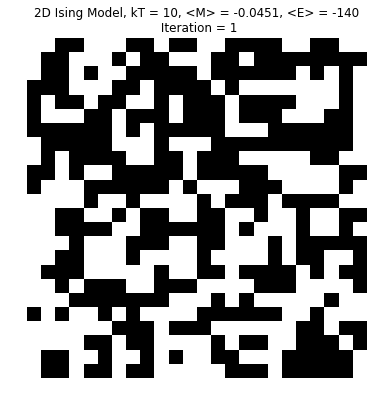

In [11]:
def createPacc(J, T):
    pacc = []
    for e_diff in np.linspace(-4,4,5):
        # Positive J is ferromagnetic
        # Negative J is anti-ferromagnetic
        pacc.append((int(e_diff), np.exp(-2*J*e_diff/T)))  
    return dict(pacc)

def measureParameter(arr, J):
    m = np.mean(arr)
    m2 = m**2
    [rows, cols] = arr.shape
    
    x, y = np.meshgrid(np.arange(0,len(arr)),np.arange(0,len(arr)))
    energy = 0
    #avoid double count. only calculate energy for botom neighbor and right neighbor
    nbor1 = [nbor[1], nbor[3]] 
    for j,i in zip(x.flatten(),y.flatten()):
        chosen_site = np.array([i, j])
        energy += calculateLocalEnergy(arr, chosen_site[0], chosen_site[1], nbor1)

    energy *= -J/(rows*cols)
    energy2 = energy**2
    return m, m2, energy, energy2

def calculateLocalEnergy(arr, chosen_i, chosen_j, nbor):
    local_energy = 0
    [rows_i, cols_j] = arr.shape
    chosen_site = np.array([chosen_i, chosen_j])
    chosen_spin = arr[chosen_i, chosen_j]
    for bor in nbor:
        neighbor = chosen_site+np.array(bor)
        index = neighbor == len(arr) #if any of the neighbor on the boundary (size of the array)
        if np.any(index):
            neighbor = neighbor%len(arr) #negative index won't be affected
            local_energy += chosen_spin*arr[neighbor[0],neighbor[1]] #add the energy of with new neighborhood index
        else:
            local_energy += chosen_spin*arr[chosen_i + bor[0], chosen_j + bor[1]]
    
    return local_energy

def iterate(arr, i):
    #print(arr)
    arr1 = arr
    [rows_i, cols_j] = arr.shape
    chosen_i = np.random.randint(0,rows_i) # from 0 to rows-1
    chosen_j = np.random.randint(0,cols_j) # from 0 to cols-1
    #print('CHosen site is x = {0} and y = {1}'.format(chosen_x, chosen_y))
    E0 = 0
    chosen_site = np.array([chosen_i, chosen_j])
    #print(chosen_site)
    chosen_spin = arr[chosen_i, chosen_j]
    E = calculateLocalEnergy(arr, chosen_i, chosen_j, nbor)
    if pacc.get(int(E)) > np.random.random_sample():
        chosen_spin *= -1
    arr1[chosen_i, chosen_j]  = chosen_spin
    m, m2, energy, energy2 = measureParameter(arr1, J)
    
    return arr1, m, m2, energy, energy2

def measureParameter(arr, J):
    m = np.mean(arr)
    m2 = m**2
    [rows, cols] = arr.shape
    
    x, y = np.meshgrid(np.arange(0,len(arr)),np.arange(0,len(arr)))
    energy = 0
    nbor1 = [nbor[1], nbor[3]]
    for j,i in zip(x.flatten(),y.flatten()):
        chosen_site = np.array([i, j])
        for bor in nbor1:
            neighbor = chosen_site+np.array(bor)
            index = neighbor == len(arr)
            if np.any(index):
                #print('Boundary')
                neighbor = neighbor%len(arr)
                energy += arr[i,j]*arr[neighbor[0],neighbor[1]]#arr[i,j]*arr[(neighbor%len(arr)).tolist()]
            else:
                #print('Non-Boundary')
                energy +=  arr[i,j]*arr[i + bor[0], j + bor[1]]
    energy *= -J
    energy2 = energy**2
    return m, m2, energy, energy2

def init(size = [10,10], init_down = 0.5):
    arr = np.random.choice([-1,1],size, p =[init_down, 1-init_down])
    fig = plt.figure(figsize=(25/3, 6.25))
    #plt.imshow(arr, cmap = "gray")
    #plt.show()
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    im = ax.imshow(arr, cmap = "gray")
    return [arr, fig, im]

def updatefig(i):
    bin_size = 2000
    im.set_data(iterate.arr)
    iterate.arr, m, m2, e, e2 = iterate(iterate.arr, i)
    Magnetization.append(m)
    Magnetization2.append(m2)
    Energy.append(e)
    Energy2.append(e2)
    plt.title('2D Ising Model, kT = {0}, <M> = {1:.4f}, <E> = {2}\n Iteration = {3:d}'.format(kT, m, e, i+1))
    #M2.append(m2)
    #[arr, fig] = init() #= init()#iterate(arr)
    if (i+1)%100 == 0:
        print('Iteration {0}'.format(i+1))
#     if i >= bin_size: # Start Construction the term for autocorrelation when the number of iteration is larger than bin_size
#         auto1 = np.array(M[i-bin_size:i-1])
#         m_.append(auto1)
#         auto2 = auto1*auto1[0]
#         mm.append(auto2)
#     if i == number_iter-1:
#         print(len(np.mean(m_, 0)))
#         AC = (np.mean(np.array(mm), 0) - np.mean(m_, 0)**2)/(np.mean(np.array(m_)**2, 0) -  np.mean(m_, 0)**2)
#         plt.show()
#         plt.plot(AC)
#         plt.title('Autocorrelation')
#         plt.xlabel('lag')
#         plt.show()
        
#         plot_acf(M)
#         plt.show()

[arr, fig, im] = init([Ly,Lx], init_down = init_down)
iterate.arr = arr


ani = animation.FuncAnimation(fig, updatefig, frames = number_iter, interval=1)
HTML(ani.to_html5_video())

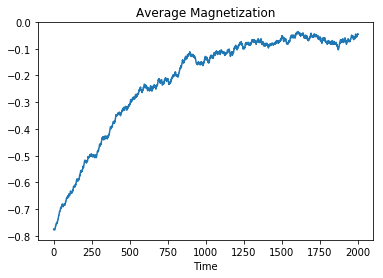

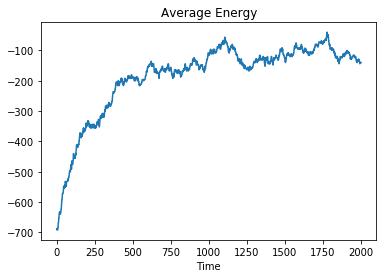

In [12]:
plt.show()
plt.plot(Magnetization)
plt.title('Average Magnetization')
plt.xlabel('Time')
plt.show()

plt.plot(Energy)
plt.title('Average Energy')
plt.xlabel('Time')
plt.show()